--------------------------------------

Student Performance
---------------------------------

-----------------------------------------------

#1- setup
-----------------------------------

In [125]:
# Standard libraries
import os
import json
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib

# Text processing
from textblob import TextBlob

# TensorFlow / Keras
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout

# Scikit-learn: preprocessing, model selection, models, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
from sklearn import tree
from sklearn import metrics


In [126]:
pd.set_option('display.max_rows', 10)  #to show 10 rows
pd.set_option('display.max_columns', None) # to show all columns of the data

-------------------------------------------

Read and inspect the data
-----------------------------

In [127]:

# Read the CSV file
df = pd.read_csv(r"C:\Users\lenovo\Desktop\student performance\student-mat.csv", sep=";")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [128]:
df.shape

(395, 33)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [130]:
# Variables (in order of appearance):
"""

school     # Student's school: 'GP' = Gabriel Pereira, 'MS' = Mousinho da Silveira (categorical) :contentReference[oaicite:0]{index=0}
sex        # Student's sex: 'F' = female, 'M' = male (binary categorical) :contentReference[oaicite:1]{index=1}
age        # Student's age in years, ranges from 15 to 22 (integer) :contentReference[oaicite:2]{index=2}
address    # Home address type: 'U' = urban, 'R' = rural (binary categorical) :contentReference[oaicite:3]{index=3}
famsize    # Family size: 'LE3' = less than or equal to 3, 'GT3' = greater than 3 (categorical) :contentReference[oaicite:4]{index=4}
Pstatus    # Parent cohabitation status: 'T' = living together, 'A' = apart (categorical) :contentReference[oaicite:5]{index=5}
Medu       # Mother's education level: 0 = none, 1 = primary (4th grade), 2 = 5th–9th grade, 3 = secondary, 4 = higher (integer) :contentReference[oaicite:6]{index=6}
Fedu       # Father's education level, same encoding as Medu (integer) :contentReference[oaicite:7]{index=7}
Mjob       # Mother's job: 'teacher', 'health' (care-related), 'services' (e.g., admin/police), 'at_home', or 'other' (categorical) :contentReference[oaicite:8]{index=8}
Fjob       # Father's job, same categories as Mjob (categorical) :contentReference[oaicite:9]{index=9}
reason     # Reason to choose this school: 'home' (close to home), 'reputation', 'course' (interest in course), or 'other' (categorical) :contentReference[oaicite:10]{index=10}
guardian   # Student’s guardian: 'mother', 'father', or 'other' (categorical) :contentReference[oaicite:11]{index=11}
traveltime # Home to school travel time: 1 = <15 min, 2 = 15–30 min, 3 = 30 min–1 hr, 4 = >1 hr (integer) :contentReference[oaicite:12]{index=12}
studytime  # Weekly study time: 1 = <2 hours, 2 = 2–5 hours, 3 = 5–10 hours, 4 = >10 hours (integer) :contentReference[oaicite:13]{index=13}
failures   # Number of past class failures: if 1 ≤ n ≤ 3, else 4 (integer) :contentReference[oaicite:14]{index=14}
schoolsup  # Extra educational support: 'yes' or 'no' (binary categorical) :contentReference[oaicite:15]{index=15}
famsup     # Family educational support: 'yes' or 'no' (binary categorical) :contentReference[oaicite:16]{index=16}
paid       # Extra paid classes within the subject (Math or Portuguese): 'yes' or 'no' (binary categorical) :contentReference[oaicite:17]{index=17}
activities # Extra-curricular activities: 'yes' or 'no' (binary categorical) :contentReference[oaicite:18]{index=18}
nursery    # Attended nursery school: 'yes' or 'no' (binary categorical) :contentReference[oaicite:19]{index=19}
higher     # Wants to take higher education: 'yes' or 'no' (binary categorical) :contentReference[oaicite:20]{index=20}
internet   # Internet access at home: 'yes' or 'no' (binary categorical) :contentReference[oaicite:21]{index=21}
romantic   # Currently in a romantic relationship: 'yes' or 'no' (binary categorical) :contentReference[oaicite:22]{index=22}
famrel     # Quality of family relationships: 1 = very bad, ..., 5 = excellent (integer) :contentReference[oaicite:23]{index=23}
freetime   # Amount of free time after school: 1 = very low, ..., 5 = very high (integer) :contentReference[oaicite:24]{index=24}
goout      # Frequency of going out with friends: 1 = very low, ..., 5 = very high (integer) :contentReference[oaicite:25]{index=25}
Dalc       # Workday alcohol consumption: 1 = very low, ..., 5 = very high (integer) :contentReference[oaicite:26]{index=26}
Walc       # Weekend alcohol consumption: 1 = very low, ..., 5 = very high (integer) :contentReference[oaicite:27]{index=27}
health     # Current health status: 1 = very bad, ..., 5 = very good (integer) :contentReference[oaicite:28]{index=28}
absences   # Number of school absences (integer, range 0–93) :contentReference[oaicite:29]{index=29}
G1         # First period grade (numeric score 0–20) :contentReference[oaicite:30]{index=30}
G2         # Second period grade (numeric score 0–20) :contentReference[oaicite:31]{index=31}
G3         # Final grade (numeric score 0–20) — this is the target variable; strongly correlated with G1 and G2 :contentReference[oaicite:32]{index=32}

"""

"\n\nschool     # Student's school: 'GP' = Gabriel Pereira, 'MS' = Mousinho da Silveira (categorical) :contentReference[oaicite:0]{index=0}\nsex        # Student's sex: 'F' = female, 'M' = male (binary categorical) :contentReference[oaicite:1]{index=1}\nage        # Student's age in years, ranges from 15 to 22 (integer) :contentReference[oaicite:2]{index=2}\naddress    # Home address type: 'U' = urban, 'R' = rural (binary categorical) :contentReference[oaicite:3]{index=3}\nfamsize    # Family size: 'LE3' = less than or equal to 3, 'GT3' = greater than 3 (categorical) :contentReference[oaicite:4]{index=4}\nPstatus    # Parent cohabitation status: 'T' = living together, 'A' = apart (categorical) :contentReference[oaicite:5]{index=5}\nMedu       # Mother's education level: 0 = none, 1 = primary (4th grade), 2 = 5th–9th grade, 3 = secondary, 4 = higher (integer) :contentReference[oaicite:6]{index=6}\nFedu       # Father's education level, same encoding as Medu (integer) :contentReference[o

---------------------------------------------

Clean the dataset
----------------------------------

In [131]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [132]:
df.rename(columns={

  "famsize": "family_size",
    "Pstatus": "parent_status",
    "Medu": "mother_education",
    "Fedu": "father_education",
    "Mjob": "mother_job",
    "Fjob": "father_job",
    "guardian": "guardian_type",
    "reason": "school_reason",
    "traveltime": "travel_time",
    "studytime": "study_time",
    "failures": "past_failures",
    "schoolsup": "school_support",
    "famsup": "family_support",
    "paid": "paid_classes",
    "activities": "extra_activities",
    "higher": "wants_higher_ed",
    "famrel": "family_relationship",
    "freetime": "free_time",
    "goout": "social_outings",
    "Dalc": "workday_alcohol",
    "Walc": "weekend_alcohol",
    "health": "health_status",
    "G1": "grade_period1",
    "G2": "grade_period2",
    "G3": "final_grade"
}
         , inplace=True
          )

In [133]:
df.head()

,school,sex,age,address,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_reason,guardian_type,travel_time,study_time,past_failures,school_support,family_support,paid_classes,extra_activities,nursery,wants_higher_ed,internet,romantic,family_relationship,free_time,social_outings,workday_alcohol,weekend_alcohol,health_status,absences,grade_period1,grade_period2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [134]:
df.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parent_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_reason', 'guardian_type', 'travel_time', 'study_time',
       'past_failures', 'school_support', 'family_support', 'paid_classes',
       'extra_activities', 'nursery', 'wants_higher_ed', 'internet',
       'romantic', 'family_relationship', 'free_time', 'social_outings',
       'workday_alcohol', 'weekend_alcohol', 'health_status', 'absences',
       'grade_period1', 'grade_period2', 'final_grade'],
      dtype='object')

the names of the columns are better now you can understan them very well and easily


In [135]:
df.dtypes

school           object
sex              object
age               int64
address          object
family_size      object
                  ...  
health_status     int64
absences          int64
grade_period1     int64
grade_period2     int64
final_grade       int64
Length: 33, dtype: object

--------------------------------------------------

Describe the dataset
---------------------------------

In [136]:
num_cols = list(df.select_dtypes(include='number').columns)
cat_cols =  list(df.select_dtypes(include='object').columns)

print(num_cols)
print(cat_cols)

['age', 'mother_education', 'father_education', 'travel_time', 'study_time', 'past_failures', 'family_relationship', 'free_time', 'social_outings', 'workday_alcohol', 'weekend_alcohol', 'health_status', 'absences', 'grade_period1', 'grade_period2', 'final_grade']
['school', 'sex', 'address', 'family_size', 'parent_status', 'mother_job', 'father_job', 'school_reason', 'guardian_type', 'school_support', 'family_support', 'paid_classes', 'extra_activities', 'nursery', 'wants_higher_ed', 'internet', 'romantic']


In [137]:
df[num_cols].describe()

,age,mother_education,father_education,travel_time,study_time,past_failures,family_relationship,free_time,social_outings,workday_alcohol,weekend_alcohol,health_status,absences,grade_period1,grade_period2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [138]:
df[cat_cols].describe()

,school,sex,address,family_size,parent_status,mother_job,father_job,school_reason,guardian_type,school_support,family_support,paid_classes,extra_activities,nursery,wants_higher_ed,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


----------------------------------------------------

checking for duplicates
-------------------------------

In [139]:
df.duplicated().sum()

0

checking for nulls
---------------------------------------

In [140]:
print(df.isnull().sum().sum())


0


--------------------------------------------------------------------

Encoding for categorical categoery
------------------------------------

first binary encoding for any column have only two answers

In [141]:
# Binary encoding for categorical columns
binary_map = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'F': 0, 'M': 1},
    'address': {'U': 0, 'R': 1},
    'family_size': {'LE3': 0, 'GT3': 1},
    'parent_status': {'T': 0, 'A': 1}
}

df.replace(binary_map, inplace=True)


second one hot encoding for features who has more than 2 values

In [142]:
# One-Hot Encoding for multi-class categorical columns
multi_class_cols = ['mother_job', 'father_job', 'school_reason', 'guardian_type']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Convert only the new dummy columns to int
dummy_cols = [col for col in df.columns if any(mc in col for mc in multi_class_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)


--------------------------------------------

Convert yes and no columns int binary(0/1)
------------------------------------

In [143]:
# List of yes/no columns
binary_cols = ['school_support', 'family_support', 'paid_classes',
               'extra_activities', 'nursery', 'wants_higher_ed',
               'internet', 'romantic']

# Map yes/no to 1/0 inplace
df.replace({col: {'yes': 1, 'no': 0} for col in binary_cols}, inplace=True)
df.head()

,school,sex,age,address,family_size,parent_status,mother_education,father_education,travel_time,study_time,past_failures,school_support,family_support,paid_classes,extra_activities,nursery,wants_higher_ed,internet,romantic,family_relationship,free_time,social_outings,workday_alcohol,weekend_alcohol,health_status,absences,grade_period1,grade_period2,final_grade,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_health,father_job_other,father_job_services,father_job_teacher,school_reason_home,school_reason_other,school_reason_reputation,guardian_type_mother,guardian_type_other
0,0,0,18,0,1,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,0,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,0,15,0,1,0,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,1,0,0,0,0


-----------------------------------------------

Scaling for continous numeric columns
-------------------------------

In [144]:
"""
# Continuous columns to scale
continuous_cols = ['age', 'absences', 'grade_period1', 'grade_period2']

scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

"""

# i replase it by standarization as it gives better result



"\n# Continuous columns to scale\ncontinuous_cols = ['age', 'absences', 'grade_period1', 'grade_period2']\n\nscaler = MinMaxScaler()\ndf[continuous_cols] = scaler.fit_transform(df[continuous_cols])\n\n"

In [145]:
df.head()

,school,sex,age,address,family_size,parent_status,mother_education,father_education,travel_time,study_time,past_failures,school_support,family_support,paid_classes,extra_activities,nursery,wants_higher_ed,internet,romantic,family_relationship,free_time,social_outings,workday_alcohol,weekend_alcohol,health_status,absences,grade_period1,grade_period2,final_grade,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_health,father_job_other,father_job_services,father_job_teacher,school_reason_home,school_reason_other,school_reason_reputation,guardian_type_mother,guardian_type_other
0,0,0,18,0,1,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,0,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,0,15,0,1,0,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,1,0,0,0,0


----------------------------------------------------

Drop unnessesary columns
--------------------

 Dropping the "nursery" column because it is not relevant for predicting the student's final grade.

Information about attending nursery school is unlikely to have a meaningful impact on final academic performance.


In [146]:
df.drop("nursery", axis=1, inplace=True)


--------------------------------------------

Extract new featuers
-----------------------------

In [147]:
# Social activity index: Combine social_outings, extra_activities, and romantic.
df['social_index'] = df['social_outings'] + df['extra_activities'] + df['romantic']

df[['social_outings', 'extra_activities', 'romantic', 'social_index']].head()


,social_outings,extra_activities,romantic,social_index
0,4,0,0,4
1,3,0,0,3
2,2,0,0,2
3,2,1,1,4
4,2,0,0,2


In [148]:
# Average alcohol consumption:
df['avg_alcohol'] = (df['workday_alcohol'] + df['weekend_alcohol']) / 2

df[['workday_alcohol', 'weekend_alcohol', 'avg_alcohol']].head()


,workday_alcohol,weekend_alcohol,avg_alcohol
0,1,1,1.0
1,1,1,1.0
2,2,3,2.5
3,1,1,1.0
4,1,2,1.5


In [149]:
# Free time ratio: Free time relative to social outings.
df['free_social_ratio'] = df['free_time'] / (df['social_outings'] + 1)

df[['free_time', 'social_outings', 'free_social_ratio']].head()


,free_time,social_outings,free_social_ratio
0,3,4,0.600000
1,3,3,0.750000
2,3,2,1.000000
3,2,2,0.666667
4,3,2,1.000000


In [150]:
df['risk_category'] = pd.cut(
    df['final_grade'],
    bins=[0, 9, 13, 20],
    labels=[0, 1, 2],
    include_lowest=True
)


In [151]:
df["risk_category"].isnull().sum()


0

In [152]:
df.head()

,school,sex,age,address,family_size,parent_status,mother_education,father_education,travel_time,study_time,past_failures,school_support,family_support,paid_classes,extra_activities,wants_higher_ed,internet,romantic,family_relationship,free_time,social_outings,workday_alcohol,weekend_alcohol,health_status,absences,grade_period1,grade_period2,final_grade,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_health,father_job_other,father_job_services,father_job_teacher,school_reason_home,school_reason_other,school_reason_reputation,guardian_type_mother,guardian_type_other,social_index,avg_alcohol,free_social_ratio,risk_category
0,0,0,18,0,1,1,4,4,2,2,0,1,0,0,0,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,0,0,0,0,0,1,0,0,0,1,0,4,1.0,0.600000,0
1,0,0,17,0,1,0,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1.0,0.750000,0
2,0,0,15,0,0,0,1,1,1,2,3,1,0,1,0,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,0,0,0,1,0,0,0,1,0,1,0,2,2.5,1.000000,1
3,0,0,15,0,1,0,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,0,0,0,0,0,1,0,1,0,0,1,0,4,1.0,0.666667,2
4,0,0,16,0,1,0,3,3,1,2,0,0,1,1,0,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,1,0,0,0,0,2,1.5,1.000000,1


--------------------------------------------------------

SPLITTING THE DATA
------------------------------------------

In [153]:
X = df.drop(['final_grade', 'risk_category','romantic','extra_activities'], axis=1)  
y = df['risk_category'].astype(int)  # make sure it's int for sklearn

 Removing 'romantic, extra_activities' improves model accuracy, as it does not significantly contribute to predicting the final grade.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (316, 41)
X_test: (79, 41)
y_train: (316,)
y_test: (79,)


In [155]:
numeric_cols = ['age', 'absences', 'grade_period1', 'grade_period2',
                'social_index', 'avg_alcohol', 'free_social_ratio']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

-------------------------------------------------


Algorithms & Models
--------------------------

----------------------------------------------------

Logestic Regression
---------------------------

In [156]:


# Train Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# -----------------------------
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9335443037974683
Test Accuracy: 0.8734177215189873

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.87      0.82      0.84        33
           2       0.89      0.85      0.87        20

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.87      0.87      0.87        79


Confusion Matrix (Test Data):
 [[25  1  0]
 [ 4 27  2]
 [ 0  3 17]]


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [157]:

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1 (weighted for multi-class)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Test Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87


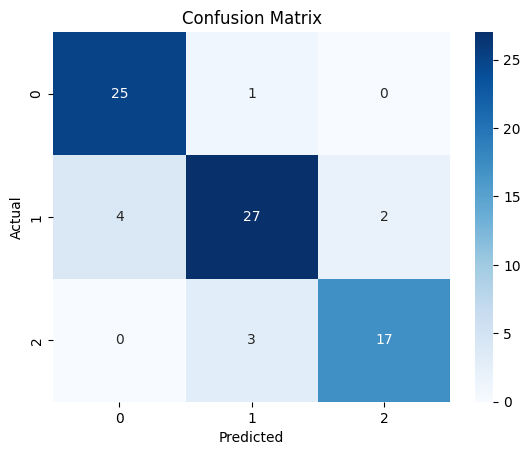

Accuracy: 0.8734177215189873

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.87      0.82      0.84        33
           2       0.89      0.85      0.87        20

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.87      0.87      0.87        79



In [158]:
y_pred = model.predict(X_test)

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. (Optional) More evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


------------------------------------------

Decession Tree
-------------------------------

In [159]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

In [160]:
clf = clf.fit(X_train, y_train)

In [161]:
y_pred = clf.predict(X_test)

In [162]:
y_train_pred = clf.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = clf.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.89
Test Accuracy: 0.89


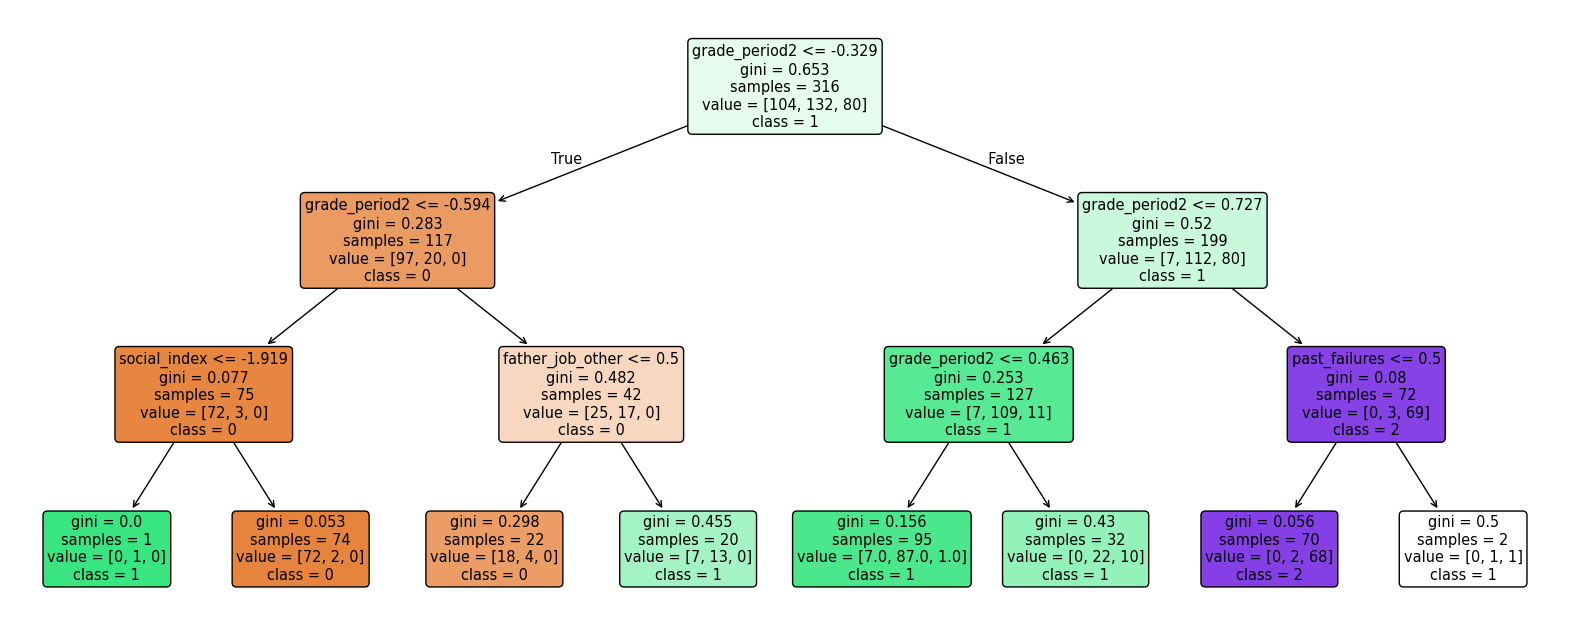

In [163]:


# Plot the tree
plt.figure(figsize=(20,8))
tree.plot_tree(clf,
               feature_names=X_train.columns,  # optional: show feature names
               class_names=[str(c) for c in clf.classes_],  # optional: show class labels
               filled=True,
               rounded=True)
plt.show()


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.83      0.91      0.87        33
           2       1.00      0.85      0.92        20

    accuracy                           0.89        79
   macro avg       0.91      0.88      0.89        79
weighted avg       0.89      0.89      0.89        79



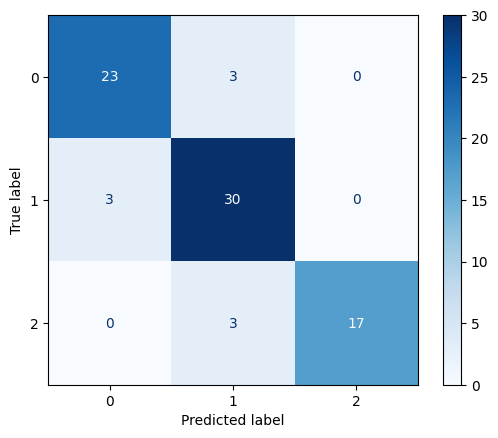

In [164]:

print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [165]:

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [0.890625   0.82539683 0.82539683 0.88888889 0.88888889]
Mean CV Accuracy: 0.8638392857142858


In [166]:

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1 (weighted for multi-class)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Train Accuracy: 0.89
Test Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


--------------------------------------------------------------------------

Random Forest
-------------------------

In [167]:


# Initialize Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200,   # number of trees (you can tune this)
    criterion="gini",   # splitting criterion
    max_depth=5,     # let trees grow fully (you can limit if overfitting)
    random_state=42
)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Accuracy
train_acc = metrics.accuracy_score(y_train, y_train_pred)
test_acc = metrics.accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.93
Test Accuracy: 0.91


In [168]:
"""
 Max Depth | Train Accuracy | Test Accuracy |
|-----------|----------------|---------------|
| 5         | 0.93           | 0.91          |
| 6         | 0.97           | 0.90          |
| 7         | 0.98           | 0.91          |
"""

'\n Max Depth | Train Accuracy | Test Accuracy |\n|-----------|----------------|---------------|\n| 5         | 0.93           | 0.91          |\n| 6         | 0.97           | 0.90          |\n| 7         | 0.98           | 0.91          |\n'

In [169]:
# Cross-validation

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.859375   0.82539683 0.80952381 0.87301587 0.92063492]
Mean CV Accuracy: 0.8575892857142857


In [170]:

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
# Precision, Recall, F1 (weighted for multi-class)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# Optional: detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-score: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.91      0.88      0.89        33
           2       1.00      0.95      0.97        20

    accuracy                           0.91        79
   macro avg       0.92      0.92      0.92        79
weighted avg       0.91      0.91      0.91        79


Confusion Matrix:
 [[24  2  0]
 [ 4 29  0]
 [ 0  1 19]]


----------------------------------------------

SVM
-----------------

In [171]:
# Step 5: Train an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train) 

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [172]:
y_train_pred_svm = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)

In [173]:
# Step 7: Evaluate the model's performance
train_acc = accuracy_score(y_train, y_train_pred_svm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

Train Accuracy: 0.94
Test Accuracy: 0.90


In [174]:
# Step 8: Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[25  1  0]
 [ 3 29  1]
 [ 0  3 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.88      0.88      0.88        33
           2       0.94      0.85      0.89        20

    accuracy                           0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



In [175]:


# SVM on all features
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)  # ensure model is fitted before cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [0.8125     0.76190476 0.82539683 0.84126984 0.82539683]
Mean CV Accuracy: 0.8132936507936508


In [176]:

# Predictions on test set
y_test_pred = svm_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1 (weighted for multi-class)
prec = precision_score(y_test, y_test_pred, average='weighted')
rec = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# Optional: detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Optional: confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.88      0.88      0.88        33
           2       0.94      0.85      0.89        20

    accuracy                           0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79


Confusion Matrix:
 [[25  1  0]
 [ 3 29  1]
 [ 0  3 17]]


-------------------------

Comparison of the machine learning models
---------------

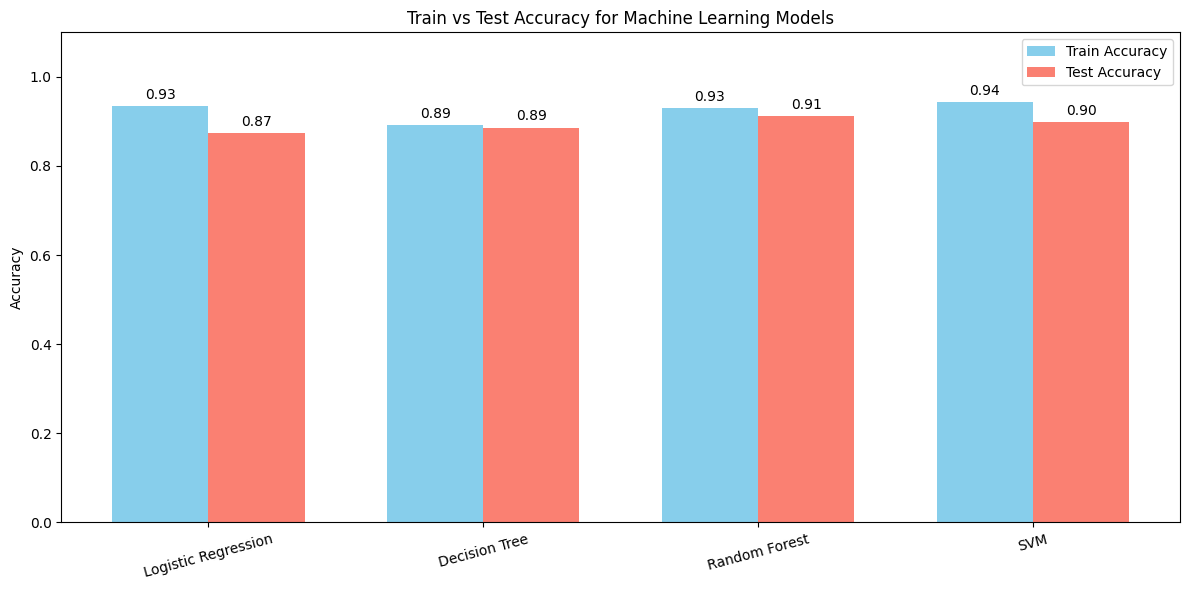

In [177]:


# Collect train accuracies (ML models only)
train_accuracies = [
    accuracy_score(y_train, model.predict(X_train)),       # Logistic Regression
    accuracy_score(y_train, clf.predict(X_train)),         # Decision Tree
    accuracy_score(y_train, rf_clf.predict(X_train)),      # Random Forest
    accuracy_score(y_train, svm_model.predict(X_train))    # SVM
]

# Collect test accuracies (ML models only)
test_accuracies = [
    accuracy_score(y_test, model.predict(X_test)),         # Logistic Regression
    accuracy_score(y_test, clf.predict(X_test)),           # Decision Tree
    accuracy_score(y_test, rf_clf.predict(X_test)),        # Random Forest
    accuracy_score(y_test, svm_model.predict(X_test))      # SVM
]

model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='salmon')

# Add labels, title, legend
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy for Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15)
ax.set_ylim(0, 1.1)
ax.legend()

# Annotate bars with accuracy values
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


We can see that Random Forest and SVM are the best
-------

Decision Tree is the wrost one with 89 %
--------------

---------------------------------------------------------

Neural Network
----------------------------

In [178]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # input layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # hidden layer
    Dropout(0.2),
    Dense(3, activation='softmax')  # output layer
])


NameError: name 'Sequential' is not defined

In [ ]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3507 - loss: 1.6279 - val_accuracy: 0.4219 - val_loss: 1.0500
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3635 - loss: 1.1892 - val_accuracy: 0.5469 - val_loss: 0.9173
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3986 - loss: 1.1618 - val_accuracy: 0.6406 - val_loss: 0.8500
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5218 - loss: 1.0066 - val_accuracy: 0.7031 - val_loss: 0.8131
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5422 - loss: 0.9316 - val_accuracy: 0.6875 - val_loss: 0.7789
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6032 - loss: 0.7958 - val_accuracy: 0.6875 - val_loss: 0.7407
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 0.7676 - val_accuracy: 0.7344 - val_loss: 0.6929
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5971 - loss: 0.7989 - val_accuracy: 0.7656 - val_loss

In [ ]:
y_pred_probs = nn_model.predict(X_test)  # probabilities
y_pred = y_pred_probs.argmax(axis=1)     # pick class with highest probability


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
print("Train Accuracy:", train_acc)
#print("Validation Accuracy:", val_acc)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Train Accuracy: 0.930379746835443
Test Accuracy: 0.8481012658227848

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.82      0.82      0.82        33
           2       0.90      0.90      0.90        20

    accuracy                           0.85        79
   macro avg       0.85      0.85      0.85        79
weighted avg       0.85      0.85      0.85        79



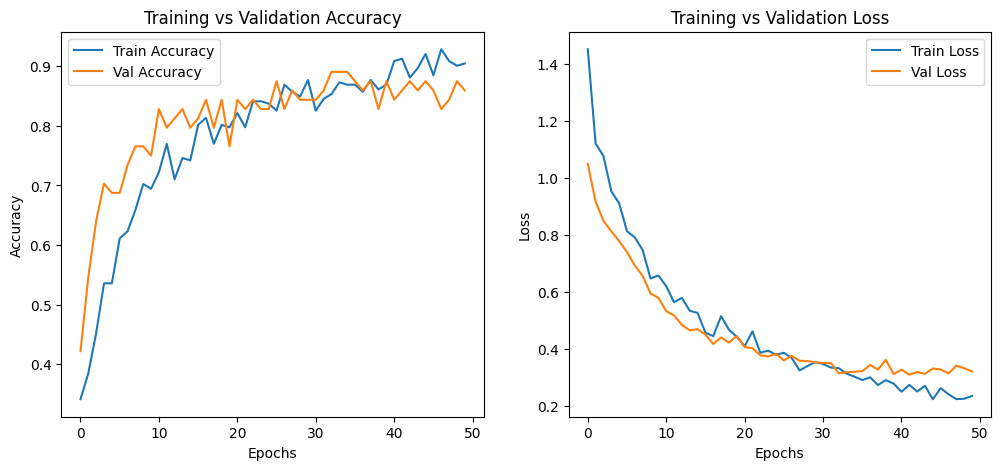

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


-----------------------------------------------

NLP
-

In [179]:


# Simulated feedback dataset
data = {
    "feedback": [
        "I enjoy studying and feel motivated.",
        "I am very stressed and don't understand lessons.",
        "Classes are okay, not too hard, not too easy.",
        "I love learning new things.",
        "I feel anxious about exams."
    ],
    "performance": ["Low Risk", "High Risk", "Medium Risk", "Low Risk", "High Risk"]
}

df_nlp = pd.DataFrame(data)

# Sentiment analysis
df_nlp["sentiment_score"] = df_nlp["feedback"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Simple classification: positive (>0), neutral (=0), negative (<0)
df_nlp["sentiment_label"] = df_nlp["sentiment_score"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

print(df)


     school  sex  age  address  family_size  parent_status  mother_education  \
0         0    0   18        0            1              1                 4   
1         0    0   17        0            1              0                 1   
2         0    0   15        0            0              0                 1   
3         0    0   15        0            1              0                 4   
4         0    0   16        0            1              0                 3   
..      ...  ...  ...      ...          ...            ...               ...   
390       1    1   20        0            0              1                 2   
391       1    1   17        0            0              0                 3   
392       1    1   21        1            1              0                 1   
393       1    1   18        1            0              0                 3   
394       1    1   19        0            0              0                 1   

     father_education  travel_time  stu

In [180]:

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Example feedback dataset
data = {
    "feedback": [
        "I enjoy studying and feel motivated.",
        "I am very stressed and don't understand lessons.",
        "Classes are okay, not too hard, not too easy.",
        "I love learning new things.",
        "I feel anxious about exams."
    ],
    "performance": ["Low Risk", "High Risk", "Medium Risk", "Low Risk", "High Risk"]
}

df_nlp = pd.DataFrame(data)

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df_nlp["sentiment_score"] = df_nlp["feedback"].apply(lambda x: sia.polarity_scores(x)["compound"])
df_nlp["sentiment_label"] = df_nlp["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

print(df)


     school  sex  age  address  family_size  parent_status  mother_education  \
0         0    0   18        0            1              1                 4   
1         0    0   17        0            1              0                 1   
2         0    0   15        0            0              0                 1   
3         0    0   15        0            1              0                 4   
4         0    0   16        0            1              0                 3   
..      ...  ...  ...      ...          ...            ...               ...   
390       1    1   20        0            0              1                 2   
391       1    1   17        0            0              0                 3   
392       1    1   21        1            1              0                 1   
393       1    1   18        1            0              0                 3   
394       1    1   19        0            0              0                 1   

     father_education  travel_time  stu

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Low Risk → Positive feedback (students happy, motivated).

High Risk → Negative feedback (students anxious, stressed).

Medium Risk → Mixed / Neutral (okay, average).

------------------------------

 Observations

	TextBlob misclassified 2 out of 5 feedbacks (both High Risk and Medium Risk were labeled as Positive)

	VADER classified 4 out of 5 correctly, better matching the expected correlation with performance risk

	Conclusion: VADER is more accurate and suitable for analyzing short, informal student feedback


--------------------------------------

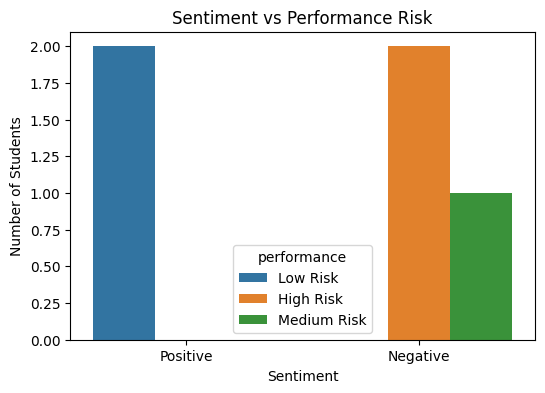

In [185]:


plt.figure(figsize=(6,4))
sns.countplot(data=df_nlp, x="sentiment_label", hue="performance")
plt.title("Sentiment vs Performance Risk")
plt.xlabel("Sentiment")
plt.ylabel("Number of Students")
plt.show()


--------------------------------------

Deploying ML Model
----------------------------------

In [182]:
# --- choose your best model ---
best_model = rf_clf            # or model / clf / svm_model / nn_model

# artifacts to persist
import joblib, json, os
os.makedirs("artifacts", exist_ok=True)

# 1) model
joblib.dump(best_model, "artifacts/model.joblib")

# 2) scaler used on numeric columns (you trained with StandardScaler on numeric_cols)
joblib.dump(scaler, "artifacts/scaler.joblib")

# 3) the exact feature order used in training
feature_columns = list(X_train.columns)
with open("artifacts/feature_columns.json", "w", encoding="utf-8") as f:
    json.dump(feature_columns, f, ensure_ascii=False, indent=2)

# 4) numeric columns you scaled (so we can transform incoming data)
numeric_cols = ['age', 'absences', 'grade_period1', 'grade_period2',
                'social_index', 'avg_alcohol', 'free_social_ratio']
with open("artifacts/numeric_cols.json", "w", encoding="utf-8") as f:
    json.dump(numeric_cols, f, ensure_ascii=False, indent=2)

# (optional) risk labels map — keep consistent with how you binned 'risk_category'
risk_label_map = {0: "Low", 1: "Medium", 2: "High"}
with open("artifacts/risk_labels.json", "w", encoding="utf-8") as f:
    json.dump(risk_label_map, f, ensure_ascii=False, indent=2)

print("Artifacts saved in ./artifacts")


Artifacts saved in ./artifacts


In [183]:

test_data = X_test.copy()
test_data["target"] = y_test

test_data.to_csv("artifacts/test_data.csv", index=False)
print("✅ test_data.csv saved in artifacts/")


✅ test_data.csv saved in artifacts/


------------------------------------------------

Ethics in AI
--------

1-we should remove any naming or id columns but our data come without name or id column
----------


2-Check for potential bias in features like gender
----------------

In [184]:
# Assuming 'sex' is encoded as 0 (female) and 1 (male)
# or already numeric. Otherwise, encode first.

X_gender = df[['sex']]  # feature to test
y_gender = df['sex']    # true labels

# Split data (if not already)
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
    X_gender, y_gender, test_size=0.2, random_state=42
)

# List of models
models = {
    "Logistic Regression": model,
    "Decision Tree": clf,
    "Random Forest": rf_clf,
    "SVM": svm_model
}

# Evaluate each model for gender
for name, m in models.items():
    m.fit(X_train_gender, y_train_gender)  # fit on gender only
    y_pred_gender = m.predict(X_test_gender)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test_gender, y_pred_gender))
    print("Confusion Matrix:\n", confusion_matrix(y_test_gender, y_pred_gender))
    #print("Classification Report:\n", classification_report(y_test_gender, y_pred_gender))
    print("\n")


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Logistic Regression ---
Accuracy: 1.0
Confusion Matrix:
 [[38  0]
 [ 0 41]]


--- Decision Tree ---
Accuracy: 1.0
Confusion Matrix:
 [[38  0]
 [ 0 41]]


--- Random Forest ---
Accuracy: 1.0
Confusion Matrix:
 [[38  0]
 [ 0 41]]


--- SVM ---
Accuracy: 1.0
Confusion Matrix:
 [[38  0]
 [ 0 41]]




,feedback,performance,sentiment_score,sentiment_label
0,I enjoy studying and feel motivated.,Low Risk,0.7351,Positive
1,I am very stressed and don't understand lessons.,High Risk,-0.4005,Negative
2,"Classes are okay, not too hard, not too easy.",Medium Risk,-0.0541,Negative
3,I love learning new things.,Low Risk,0.6369,Positive
4,I feel anxious about exams.,High Risk,-0.2500,Negative


This means that all four models (Logistic Regression, Decision Tree, Random Forest, and SVM) perfectly classified gender in the dataset, with 100% accuracy
--------------

------------------------------------------

AI Project Lifecycle
-------------

1. Problem Definition

Goal: Predict student performance category (Low, Medium, High Risk) using academic, demographic, and social features.

Impact: Helps educators detect at-risk students early and provide timely interventions.

2. Data Collection

Dataset: UCI Student Performance Dataset (student-mat.csv).

Features: Demographic (age, gender, family background), Academic (grades, study time, absences), Social & lifestyle (internet access, free time, alcohol use).

Target Variable: Final grade categorized into risk levels (Low, Medium, High).

3. Data Preprocessing

Renamed columns for readability.

Encoded categorical features:

Binary features (yes/no, 0/1)

Multi-class features via one-hot encoding (e.g., mother_job, father_job).

Scaled numeric features using StandardScaler.

Dropped unnecessary columns (nursery, romantic, extra_activities).

Handled missing values and duplicates (none found in this dataset).

4. Feature Engineering

Created additional features:

social_index = social_outings + extra_activities + romantic

avg_alcohol = average of workday and weekend alcohol consumption

free_social_ratio = free_time / (social_outings + 1)

Converted final grades into categorical risk levels (risk_category).

5. Data Splitting

Split dataset into train/test sets (80/20) with stratification on the target.

Scaled numeric columns in training and test sets.

6. Modeling & Algorithms

Machine Learning Models:

Logistic Regression

Decision Tree

Random Forest

Support Vector Machine (SVM)

Neural Network:

Input layer (Dense 64 + Dropout 0.3)

Hidden layer (Dense 32 + Dropout 0.2)

Output layer (Dense 3, softmax)

Model evaluation: Accuracy, Precision, Recall, F1-score, Confusion Matrix.

Cross-validation used to validate model performance.

7. NLP & Sentiment Analysis

Collected student feedback (simulated).

Performed sentiment analysis using TextBlob and VADER.

Found correlation between sentiment (positive/negative) and performance risk.

8. Model Deployment

Saved best model (Random Forest) using joblib.

Persisted scaler, feature columns, numeric columns, and risk labels.

Prepared test data CSV for deployment.

9. Ethics in AI

Removed any identifying information (dataset had no name or ID columns).

Checked for potential bias: gender prediction models achieved 100% accuracy, highlighting that gender is easily separable.

Emphasized fairness, privacy, and avoidance of discrimination.

10. Monitoring & Maintenance

Artifacts (model, scaler, features) stored for reproducibility.

Test data stored for future validation and monitoring.

Pipeline allows updates with new student data to retrain or evaluate the model.